<a href="https://colab.research.google.com/github/dev-SB/Airline_Analysis/blob/master/airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

In [0]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib

from IPython.core.pylabtools import figsize
%matplotlib inline

# matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.dpi'] = 200

In [80]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dev-SB/Airline_Analysis/master/formatted_flights.csv', usecols=[1, 2])
df.columns = ['delay', 'flight_name']
display(df.head())
display(df['delay'].min())
display(df['delay'].max())

,delay,flight_name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


-60.0

120.0

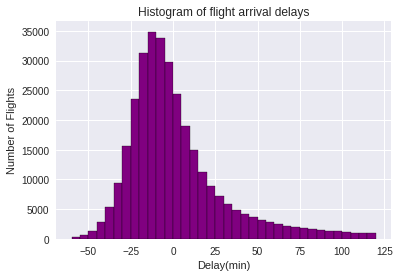

In [81]:
plt.hist(df['delay'],
         color='purple',
         edgecolor='black',
         bins=int(180/5))
plt.title('Histogram of flight arrival delays')
plt.xlabel('Delay(min)')
plt.ylabel('Number of Flights')
plt.show()

Text(0, 0.5, 'Probability')

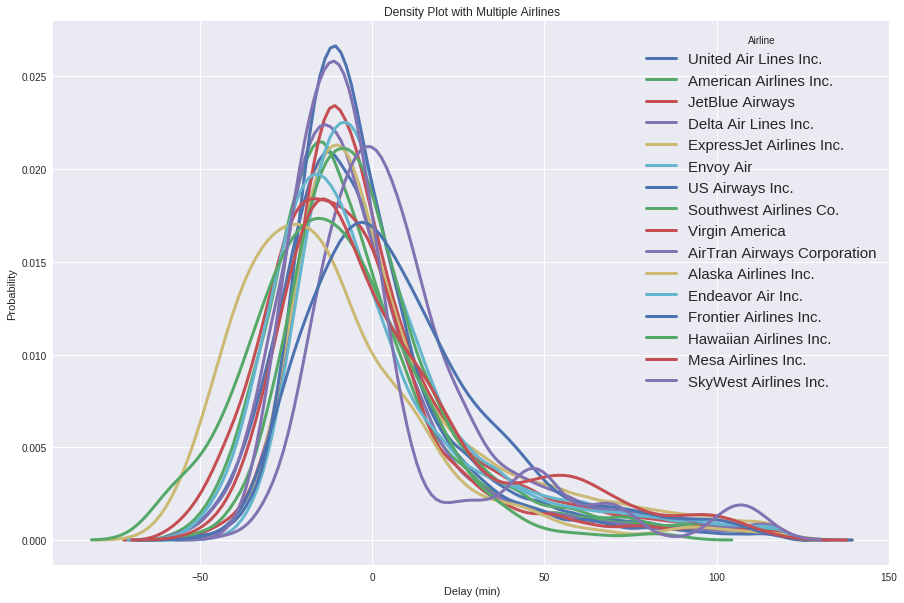

In [82]:
figsize(15, 10)
airlines = df['flight_name'].unique().tolist()
for airline in airlines:
    subset = df[df['flight_name'] == airline]
    sns.distplot(subset['delay'], hist=False, kde=True,
                 kde_kws={'linewidth': 3, 'shade': False},
                 label=airline)
plt.legend(prop={'size': 15}, title='Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

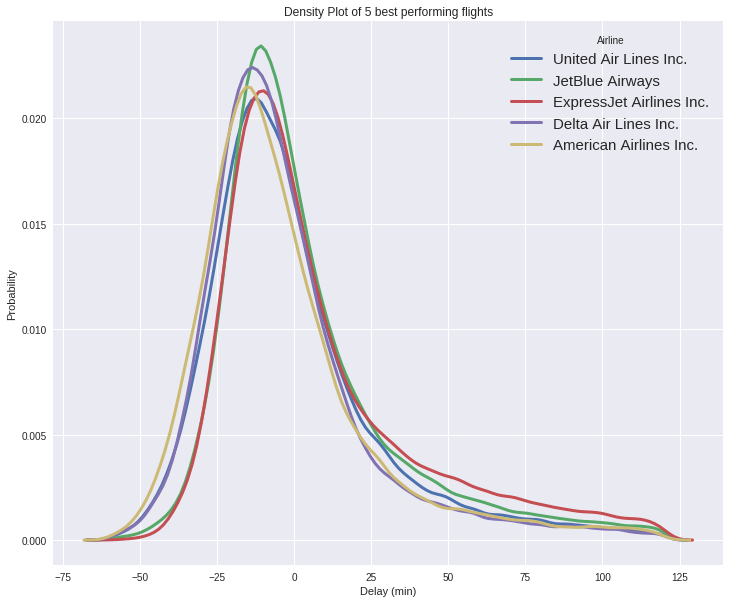

In [83]:
figsize(12, 10)
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
            'Delta Air Lines Inc.', 'American Airlines Inc.']

for airline in airlines:
    subset = df[df['flight_name'] == airline]
    sns.distplot(subset['delay'], 
                 hist=False, 
                 kde=True,
                 kde_kws={'linewidth': 3},
                 label=airline)

plt.legend(prop={'size': 15}, title='Airline')
plt.title('Density Plot of 5 best performing flights')
plt.xlabel('Delay (min)')
plt.ylabel('Probability')

From this Density Plot we can conclude that:


---


American Airline Inc. is one of the preferred Airline Company as it has one of the least number of delayed flights. 

### Central Limit Theorem


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


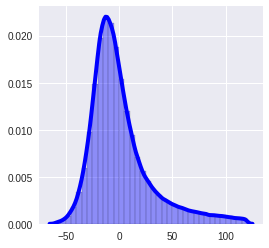

In [84]:
figsize(4,4)
sns.distplot(tuple(df['delay']),
             hist=True,
             kde=True,
             bins=int(180/5),
             color='blue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


In [0]:
std_sample = [np.std(df['delay'])/(10**0.5),
              np.std(df['delay'])/(20**0.5),
              np.std(df['delay'])/(30**0.5),
              np.std(df['delay'])/(50**0.5),
              np.std(df['delay'])/(100**0.5),
              np.std(df['delay'])/(500**0.5)]
clt_avg_n = ['10', '20', '30',
             '50', '100', '500']
clt_avg = [[np.mean(random.choices(df['delay'], k=10)) for _ in range(100)],
           [np.mean(random.choices(df['delay'], k=20)) for _ in range(100)],
           [np.mean(random.choices(df['delay'], k=30)) for _ in range(100)],
           [np.mean(random.choices(df['delay'], k=50)) for _ in range(1000)],
           [np.mean(random.choices(df['delay'], k=100)) for _ in range(1000)],
           [np.mean(random.choices(df['delay'], k=500)) for _ in range(1000)]]

Population Mean: 1.2971432896160044 Population Standard Deviation: 29.064355196654887
Sample size: 10
Population Mean:1.2971432896160044, Mean of Sample Mean:1.2859999999999996
Expected Standard Deviation:9.190956114558048, Standard Error:9.499642309055643
Sample size: 20
Population Mean:1.2971432896160044, Mean of Sample Mean:0.25300000000000006
Expected Standard Deviation:6.49898739419196, Standard Error:6.316564810084672
Sample size: 30
Population Mean:1.2971432896160044, Mean of Sample Mean:2.0916666666666663
Expected Standard Deviation:5.306400986850127, Standard Error:5.210699195991946
Sample size: 50
Population Mean:1.2971432896160044, Mean of Sample Mean:1.3920599999999999
Expected Standard Deviation:4.110320530073828, Standard Error:4.136558830283936
Sample size: 100
Population Mean:1.2971432896160044, Mean of Sample Mean:1.30829
Expected Standard Deviation:2.9064355196654885, Standard Error:2.900543496639897
Sample size: 500
Population Mean:1.2971432896160044, Mean of Sample 

Text(0, 0.5, 'Density')

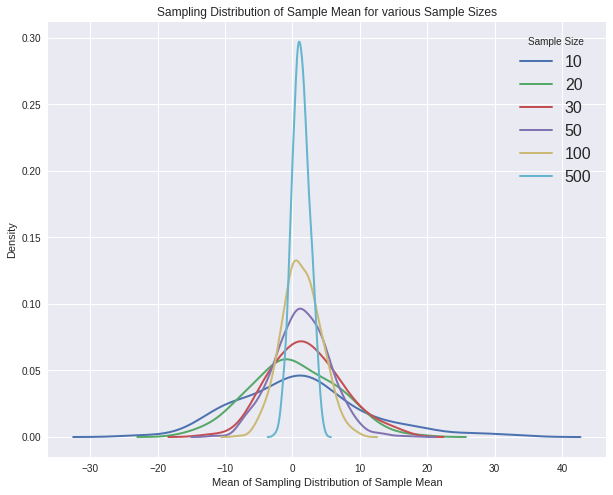

In [97]:
print('Population Mean:',average, 'Population Standard Deviation:',standard_dev)
figsize(10,8)
for i in range(clt_avg.__len__()):
    print('Sample size:',clt_avg_n[i])
    print('Population Mean:', average, ', Mean of Sample Mean:',
          np.average(clt_avg[i]), sep='')
    print('Expected Standard Deviation:', std_sample[i],
          ", Standard Error:", np.std(clt_avg[i]), sep='')
    sns.distplot(clt_avg[i],
                 hist=False,
                 kde=True,
                 hist_kws={'edgecolor': 'black'},
                 label=clt_avg_n[i],
                 kde_kws={'linewidth': 2})
plt.legend(prop={'size': 16}, title='Sample Size')
plt.title('Sampling Distribution of Sample Mean for various Sample Sizes')
plt.xlabel('Mean of Sampling Distribution of Sample Mean')
plt.ylabel('Density')

### From this density plot we can conclude that:


---


1. Graph obtained by sample size >=30 closely resembles normal distribution.
2. As sample size increases graph gets narrower.
3. Spread of smapling distribution of sample mean is less than the population.
4. Sample mean is roughly equal to population mean for sample size>=100.
5. Sample Standard deviation is roughly equal to Population Standard Deviation/square root of sample size.



